<a href="https://colab.research.google.com/github/DorianD6/NBHV-G4360-Intro-Theory-2021/blob/main/Assignment_2_Dongrui_Deng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NBHV G4360 Introduction to Theoretical Neuroscience**

# **Assignment 2 by Dongrui Deng UNI:dd3001**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

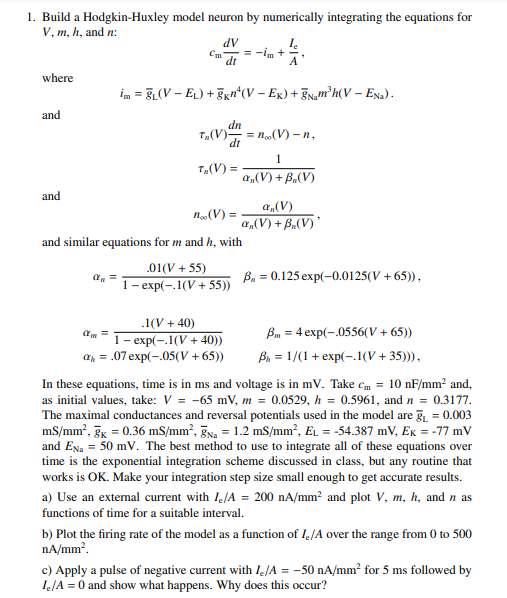

### Part 1: Ion channels 
The kinetics of gates of ion channels at a particular membrane potential $V$ can be described by a differential equation:


> $\frac{dn}{dt} = \alpha_n (V) (1-n) - \beta_n(V) n, ~~~~$ 

where $n$ is the probability that the channel's gate is being open, $\alpha$ is the opening rate and $\beta$ is the closing rate. Dividing the equation by $\alpha_n (V) + \beta_n(V)$, we obtain


> $ \tau_n (V) \frac{dn}{dt} = n_\infty (V) - n, ~~~~$ 

where time constant


> $\tau_n(V) = \frac{1}{\alpha_n (V) + \beta_n(V)}, ~~~~$ 

and the probability of a gate being open at steady state


> $n_\infty(V) = \frac{\alpha_n (V)}{\alpha_n (V) + \beta_n(V)}. ~~~~$ 

Some channels are persistent in which the probability of a gate open increase when the neuron is depolarized and decrease when it is hyperpolized, for example, potassium channel. Some other channels only open transiently when the neuron is depolarized because they are gated by **two** processes with opposite voltage dependence, for example, sodium channel (see Figure 5.8 in the textbook for details). We used $n$ to denote a subunit gating process in a potassium channel and $m$ and $h$ to denote the two gating processes in a sodium channel.

$\alpha (V)$ and $\beta (V)$ are obtained by fitting experimental data, here we used:


> $\alpha_n(V) = \frac{0.01(V+55)}{1- \exp(-(V+55)/10)}$ &ensp; and &ensp; $\beta_n(V) = 0.125 \exp(-0.0125(V+65)),$

> $\alpha_m(V) = \frac{0.1(V+40)}{1- \exp(-(V+40)/10)}$ &ensp; and &ensp; $\beta_m(V) = 4 \exp(-0.0556(V+65)),$

> $\alpha_h(V) = 0.07 \exp(-0.05(V+65)) $ &ensp; and &ensp; $\beta_h(V) = \frac{1}{1 + \exp(-(V+35)/10)},$




Write functions describing the kinetics of potassium and sodium channels. 

After that, plot:

- $n_\infty(V)$, $m_\infty(V)$, $h_\infty(V)$ against membrane potential $V$.
- $\tau_n(V)$, $\tau_m(V)$, $\tau_h(V)$ against membrane potential $V$.

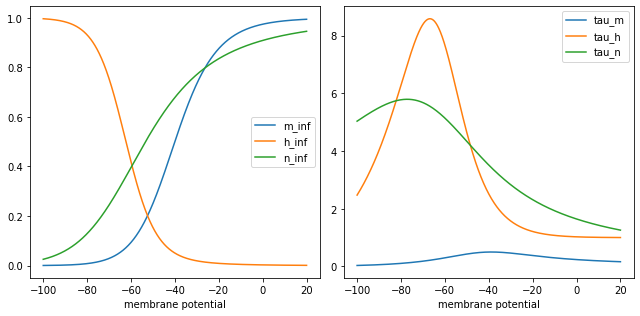

In [4]:
# Ion Channels
def calculate_n(v):
    # Complete the function
    alpha_n = (0.01 * (v + 55.)) / (1 - np.exp( - (v + 55.) / 10.))
    beta_n = 0.125 * np.exp(-0.0125 * (v + 65.))
    n_inf = alpha_n / (alpha_n + beta_n)
    tau_n = 1 / (alpha_n + beta_n)
    return n_inf , tau_n

def calculate_m(v):
    # Complete the function
    alpha_m = (0.1 * (v + 40.0)) / (1 - np.exp( - (v + 40.) / 10.))
    beta_m = 4 * np.exp(-0.0556 * (v + 65.))
    m_inf = alpha_m / (alpha_m + beta_m)
    tau_m = 1 / (alpha_m + beta_m)
    return m_inf, tau_m


def calculate_h(v):
    # Complete the function
    alpha_h = 0.07 * np.exp(-0.05 * (v + 65.))
    beta_h = 1 / (1 + np.exp(-( v + 35.) / 10.))
    h_inf = alpha_h / (alpha_h + beta_h)
    tau_h = 1 / (alpha_h + beta_h)
    return h_inf, tau_h

#Plot n,m,h_inf and tau_m,h,n vs. v
v=np.linspace(-100,20,1000)
minf,mt =calculate_m(v)
hinf,ht =calculate_h(v)
ninf,nt =calculate_n(v)

plt.figure(figsize=[9,4.5])
plt.subplot(1,2,1)
plt.plot(v,minf)
plt.plot(v,hinf)
plt.plot(v,ninf)
plt.legend(['m_inf','h_inf','n_inf'])
plt.xlabel('membrane potential')

plt.subplot(1,2,2)
plt.plot(v,mt)
plt.plot(v,ht)
plt.plot(v,nt)
plt.legend(['tau_m','tau_h','tau_n'])
plt.xlabel('membrane potential');
plt.tight_layout()
plt.show()

### Part 2: Hodgkin-Huxley Model


The Hodgkin-Huxley model with an electrode current is described by a differential equation:

> $c_m \frac{dV}{dt} = -i_m + \frac{I_e}{A}$,

where the membrane current (per unit area)
> $i_m = g_L (V - E_L) + g_\text{K} n^4 (V-E_\text{K}) + g_{\text{Na}} m^3 h  (V-E_{\text{Na}})$,

$c_m$ is the specific membrane capacitance, $g$'s are the maximal conductances,\
$E$'s are the reversal potentials and $\frac{I_e}{A}$ is the electrode current density. 

**Follow the parameters described below:**  
Simulation duration = 200[ms];  
Temporal step size, $\Delta t$ = 0.01 [ms];  
Electrode current density, $\frac{I_e}{A}$ = 200 [nA/mm<sup>2</sup>];  
$E_{\text{Na}}$ = 50 [mV], $E_{\text{K}}$ = -77 [mV], $E_L$ = -54.387 [mV];  
$g_{\text{Na}}$ = 1.2 [mS/mm<sup>2</sup>] = 1200 [$\mu$S/mm<sup>2</sup>],  
$g_{\text{K}}$= 0.36  [mS/mm<sup>2</sup>] = 360 [$\mu$S/mm<sup>2</sup>], \
$g_{L}$ = 0.003 [mS/mm<sup>2</sup>] = 3 [$\mu$S/mm<sup>2</sup>];   
$c_m$ = 10 [nF/mm<sup>2</sup>] 

Use Exponential Method to update the values at each step.

In [5]:
# Hodgkin-Huxley Model
def simulate_HH(init_v=-65., g_L=3, g_K=360, g_Na=1200, E_L=-54.387 , E_K=-77., E_Na=50., c_m=10., duration=200, dt=0.01, i_e=None):
    '''
    init_v: initial membrane potential
    g: maximal conductance
    E: reversal potentials
    c_m: specific membrane capacitance
    duration: Simulation duration
    dt: Temporal step size
    i_e: electrode current density
    '''
    v = np.zeros(int(duration/dt))
    n = np.zeros(int(duration/dt))
    m = np.zeros(int(duration/dt))
    h = np.zeros(int(duration/dt))
    im = np.zeros(int(duration/dt))
    v[0] = init_v
    n[0] = 0.3177
    m[0] = 0.0529
    h[0] = 0.5961

    for k in range(int(duration/dt)-1):
        # In order to use Exponential Method to update v
        # Calculate the tau and v_inf first (at point k)
        # In this case we no longer calculate membrane current explicitly
        denom = g_L + g_K * (n[k]**4) + g_Na * (m[k]**3)*h[k]
        tau = c_m / denom
        v_inf = (g_L * E_L + g_K * (n[k]**4) * E_K + g_Na * (m[k]**3)*h[k] * E_Na + i_e[k]) / denom

        # Update v using Exponential Method
        v[k+1] = v_inf + (v[k] - v_inf) * np.exp(-dt / tau)
        
        # Calculate the kinetics of channels
        n_inf, tau_n = calculate_n(v[k])
        m_inf, tau_m = calculate_m(v[k])
        h_inf, tau_h = calculate_h(v[k])

        # Update n,m,h using Exponential Method
        n[k+1] = n_inf + (n[k] - n_inf) * np.exp(-dt / tau_n)
        m[k+1] = m_inf + (m[k] - m_inf) * np.exp(-dt / tau_m)
        h[k+1] = h_inf + (h[k] - h_inf) * np.exp(-dt / tau_h)
    return v, n, m, h

### Problem 1a) H-H Model Simulation
Set up a current with Current Density $\frac{I_e}{A}$ = 200 [mA/mm<sup>2</sup>] \
 The input starts at 10[ms] and ends at 188[ms] with simuation duration = 200[ms] \
(188 is just for a nice plot in the next section.)

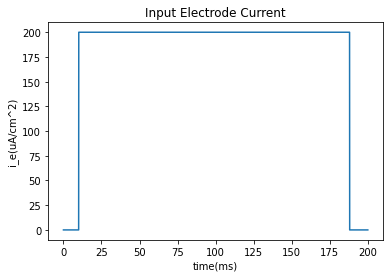

In [6]:
# Setup I_e/A
def setup_i_e(start_time=10, end_time=188, duration=200, dt=0.01, current_density=200): 
    i_e = []
    for k in range(int(duration/dt)):
      if k >= int(start_time/dt) and k <= int(end_time/dt):
        i_e.append(current_density)
      else:
        i_e.append(0)
    return i_e
i_e = setup_i_e()
t = np.arange(0, 200, 0.01)
plt.figure()
plt.plot(t, i_e)
plt.title('Input Electrode Current')
plt.xlabel('time(ms)')
plt.ylabel('i_e(uA/cm^2)')
plt.show()

### Problem 1a) (Cont'd)
With the functions defined in Part 1 and 2 and the electrode current = 200 [mA/mm<sup>2</sup>] , set the initial membrane potential as -65 [mV] and solve the HH equation numerically by using Exponential Method from 0 to 200 [ms] with a 0.01 [ms] temporal step size, then

- Plot the membrane potential $V$ against time.  
- Plot $n$ against time. 
- Plot $m$ against time. 
- Plot $h$ against time. 

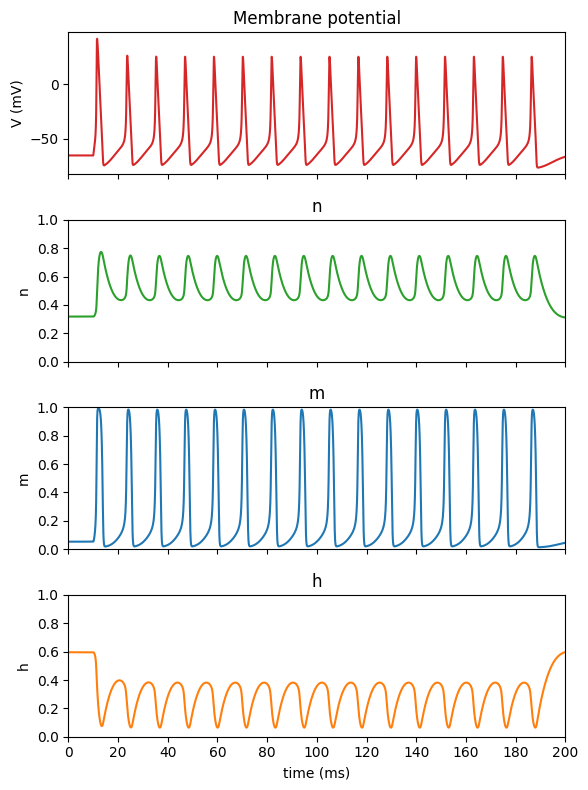

In [8]:
v, n, m, h = simulate_HH(i_e=i_e)

fig, ax= plt.subplots(4, sharex=True,figsize=(6,8), dpi=100)
ax[0].plot(v, color='C3')
ax[0].set_title('Membrane potential')
ax[0].set_ylabel('V (mV)')

ax[1].plot(n, color='C2')
ax[1].set_title('n')
ax[1].set_ylabel('n')
ax[1].set_ylim(0,1)

ax[2].plot(m, color='C0')
ax[2].set_title('m')
ax[2].set_ylabel('m')
ax[2].set_ylim(0,1)

ax[3].plot(h, color='C1')
ax[3].set_xticks(range(0,20001,2000))
ax[3].set_xticklabels(range(0,201,20))
ax[3].set_xlabel('time (ms)')
ax[3].set_ylim(0,1)
ax[3].set_xlim(0,20000)
ax[3].set_title('h')
ax[3].set_ylabel('h');

plt.tight_layout()

### Problem 1b) Firing Rate
Plot Firing Rate as a function of Current Density $\frac{I_e}{A}$ from 0 to 500 [mA/mm<sup>2</sup>]

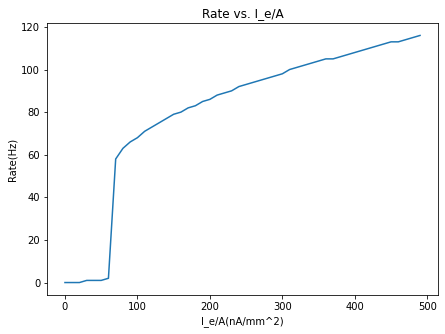

In [ ]:
# Define spike detection function
# For every time index, the function checks if the voltage at time index is
# greater than a certain threshold AND checks if this volage value is a local maxima
# so that we find the peak of the spike
def spike_detect(v, thresh=0):
    x = (v[2:-1] > v[1:-2]) * (v[2:-1] > v[3:]) * (v[2:-1] > thresh)
    x = np.append(False, x)
    x = np.append(x, False)
    return x
# Change i_e Value from 0 to 500[nA/mm^2]
i_e_value = np.arange(0,500,10)
# Count Spikes and Calculate Rates
Count = np.zeros(50)
Rate = np.zeros(50)
for l in range(50):
  i_e = i_e_value[l] * np.ones(100000)
  v, n, m, h = simulate_HH(i_e=i_e, duration=1000)
  count = np.sum(spike_detect(v))
  Count[l] = count
  Rate[l] = count / 1
# Plot Rate vs. I_e/A
plt.figure(figsize=(7,5))
plt.plot(i_e_value, Rate)
plt.title('Rate vs. I_e/A')
plt.xlabel('I_e/A(nA/mm^2)')
plt.ylabel('Rate(Hz)')
plt.show()

### Problem 1c) Apply a Pulse of Negative Current

Set up a current input starting at 30[ms] with a negative value of Current Density \
$\frac{I_e}{A}$ = -50 [mA/mm<sup>2</sup>] for 5[ms] followed by Current Density = $\frac{I_e}{A}$ = 0 [mA/mm<sup>2</sup>] 

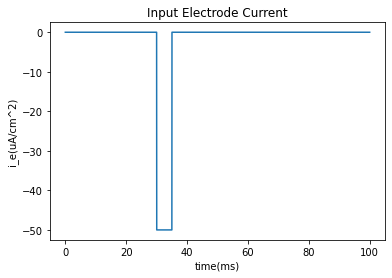

In [9]:
def setup_i_e(start_time=30, end_time=35, duration=100, dt=0.01, current_density=-50): 
    i_e = []
    for k in range(int(duration/dt)):
      if k >= int(start_time/dt) and k <= int(end_time/dt):
        i_e.append(current_density)
      else:
        i_e.append(0)
    return i_e
i_e = setup_i_e()
t = np.arange(0, 100, 0.01)
plt.figure()
plt.plot(t, i_e)
plt.title('Input Electrode Current')
plt.xlabel('time(ms)')
plt.ylabel('i_e(uA/cm^2)')
plt.show()

##### Plot Membrane Potential, n, m, h vs. time

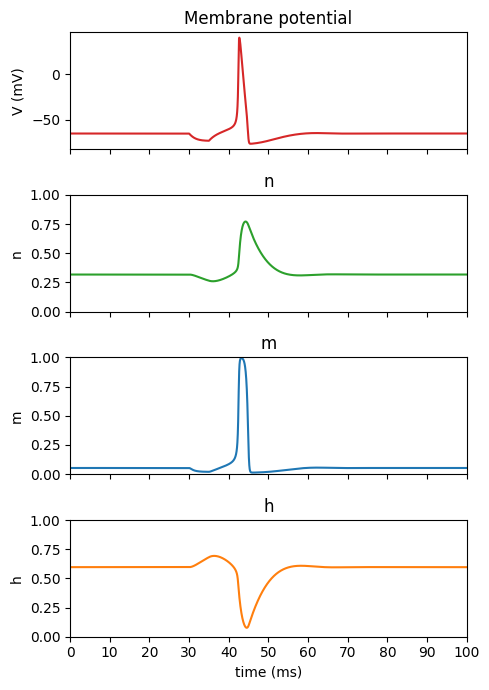

In [10]:
v, n, m, h = simulate_HH(i_e=i_e, duration=100)

fig, ax= plt.subplots(4, sharex=True,figsize=(5,7), dpi=100)
ax[0].plot(v, color='C3')
ax[0].set_title('Membrane potential')
ax[0].set_ylabel('V (mV)')

ax[1].plot(n, color='C2')
ax[1].set_title('n')
ax[1].set_ylabel('n')
ax[1].set_ylim(0,1)

ax[2].plot(m, color='C0')
ax[2].set_title('m')
ax[2].set_ylabel('m')
ax[2].set_ylim(0,1)

ax[3].plot(h, color='C1')
ax[3].set_xticks(range(0,10001,1000))
ax[3].set_xticklabels(range(0,101,10))
ax[3].set_xlabel('time (ms)')
ax[3].set_ylim(0,1)
ax[3].set_xlim(0,10000)
ax[3].set_title('h')
ax[3].set_ylabel('h');

plt.tight_layout()

#### Problem 1c) **Observation**

The plot indicates that the membrane potential drops below the resting potential after the neuron received a negative current input, \
which means that an injection of negative current can cause a brief hyperpolarization of the cell. The Sodium Ion Channels will be \
"deinactivated" then followed by an activation as I could see in my plot that there is a slight increase of h followed by a growth spurt of m. \
Consequently, there would be an action potential following the process.

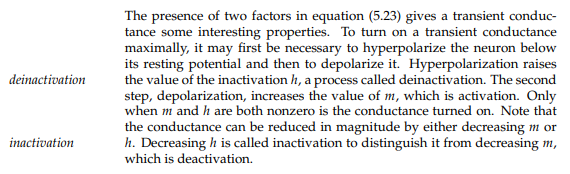

**Reference:**   p.172 Theoretical Neuroscience: Computational and Mathematical Modeling of Neural Systems, Dayan and Abbott, 2005.

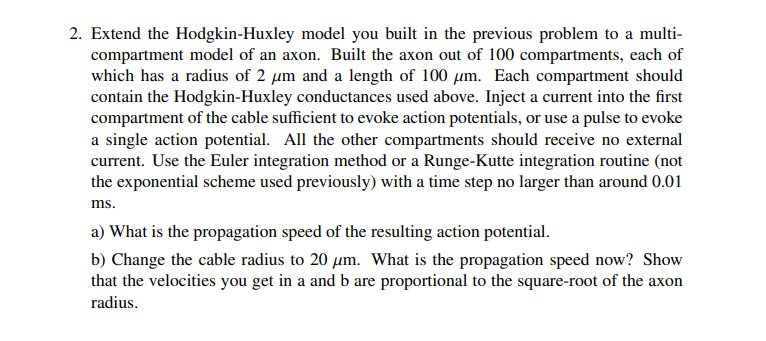

### Problem 2a) Building a Moder of an Axon with extending H-H Model


In [ ]:
def HH_compartments(g_L=3, g_K=360, g_Na=1200, E_L=-54.387 , E_K=-77., E_Na=50., c_m=10., duration=25, dt=0.001, i_e=500):
  V[0, :] = -65.0
  n[0, :] = 0.3177
  m[0, :] = 0.0529
  h[0, :] = 0.5961
  for i in range(int(duration/dt)-1):
    for j in range(100): 
      # Calculate membrane current
      i_m = g_L * (V[i, j] - E_L) + g_K * (n[i, j]**4) * (V[i, j] - E_K) + g_Na * (m[i, j]**3)*h[i, j] * (V[i, j] - E_Na)
      # Calculate dV/dt   
      if j==0:
        dVdt = (g_l * (V[i, j+1] - V[i, j]) + i_e - i_m) / c_m 
      elif j==99:
        dVdt = (g_l * (V[i, j-1] - V[i, j]) - i_m) / c_m
      else:
        dVdt = (g_l * ((V[i, j-1] - V[i, j]) + (V[i, j+1] - V[i, j])) - i_m) / c_m
      # Update V with Euler Method
      V[i+1, j] = V[i, j] + dVdt * dt
      # Calculate the kinetics of channels
      n_inf, tau_n = calculate_n(V[i, j])
      m_inf, tau_m = calculate_m(V[i, j])
      h_inf, tau_h = calculate_h(V[i, j])
      # Update n,m,h using Euler Method
      n[i+1, j] = n[i, j] + (n[i, j] - n_inf) * (-dt / tau_n)
      m[i+1, j] = m[i, j] + (m[i, j] - m_inf) * (-dt / tau_m)
      h[i+1, j] = h[i, j] + (h[i, j] - h_inf) * (-dt / tau_h)
  return V

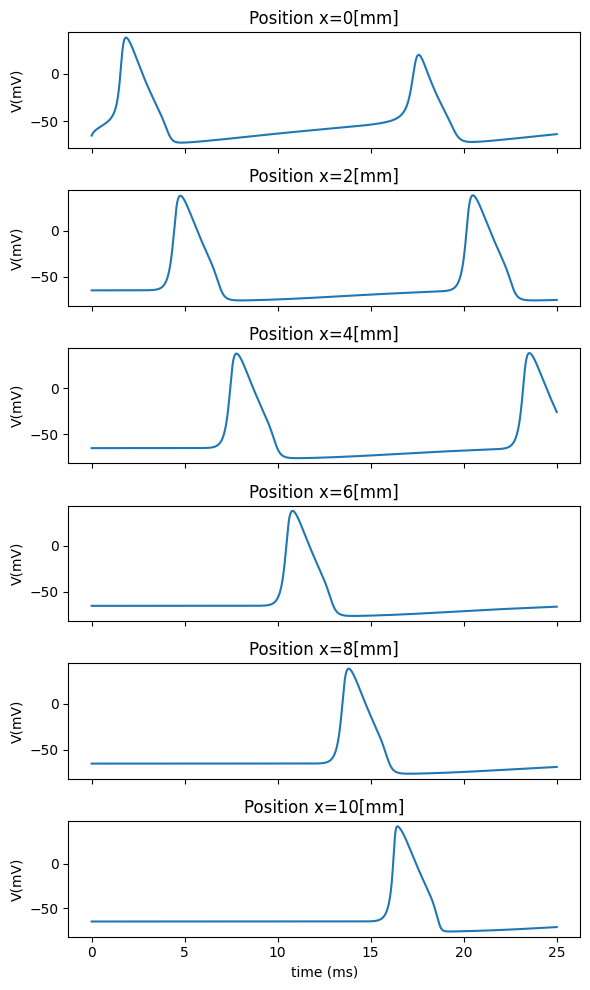

In [ ]:
# Input the Data of Axon
a = 2 * 10**(-3) #[mm]
r_L = 10**(-3) #[MOhm * mm]
l = 0.1 #[mm]
g_l = a / (2 * r_L * l**2)
# Define Matrix Size
t = np.arange(0, 25, 0.001)
V = np.zeros((25000, 101))
n = np.zeros_like(V)
m = np.zeros_like(V)
h = np.zeros_like(V)
# Apply the Model
V = HH_compartments()
# Plot Functions
fig, ax= plt.subplots(6, sharex=True, figsize=(6,10), dpi=100)
ax[0].plot(t, V[:, 0])
ax[0].set_title('Position x=0[mm]')
ax[0].set_ylabel('V(mV)')

ax[1].plot(t, V[:, 20])
ax[1].set_title('Position x=2[mm]')
ax[1].set_ylabel('V(mV)')

ax[2].plot(t, V[:, 40])
ax[2].set_title('Position x=4[mm]')
ax[2].set_ylabel('V(mV)')

ax[3].plot(t, V[:, 60])
ax[3].set_title('Position x=6[mm]')
ax[3].set_ylabel('V(mV)')

ax[4].plot(t, V[:, 80])
ax[4].set_title('Position x=8[mm]')
ax[4].set_ylabel('V(mV)')

ax[5].plot(t, V[:, 99])
ax[5].set_title('Position x=10[mm]')
ax[5].set_ylabel('V(mV)')
ax[5].set_xlabel('time (ms)')
plt.tight_layout()

To be precisely, the last plot is showing the V vs time of the last (100) compartment, \
which is corresponding to the position of 9.9[mm] from the defined starting point.

### Problem 2a) (Cont'd) Calculate the Speed

In [ ]:
#Calculate the Speed
for m in range (25000):
  if V[m, 20] >= 20:
    a = m
    break
for n in range (25000):
  if V[n, 80] >= 20:
    b = n
    break
time_dif = (b-a) * 0.001
dis = 8 - 2
speed1 = dis / time_dif
print(speed1, '[m/s]')
#[mm/ms] = [m/s]

0.6632765863365023 [m/s]


### Problem 2b) Change the Radius and Explore the Propergation Speed 

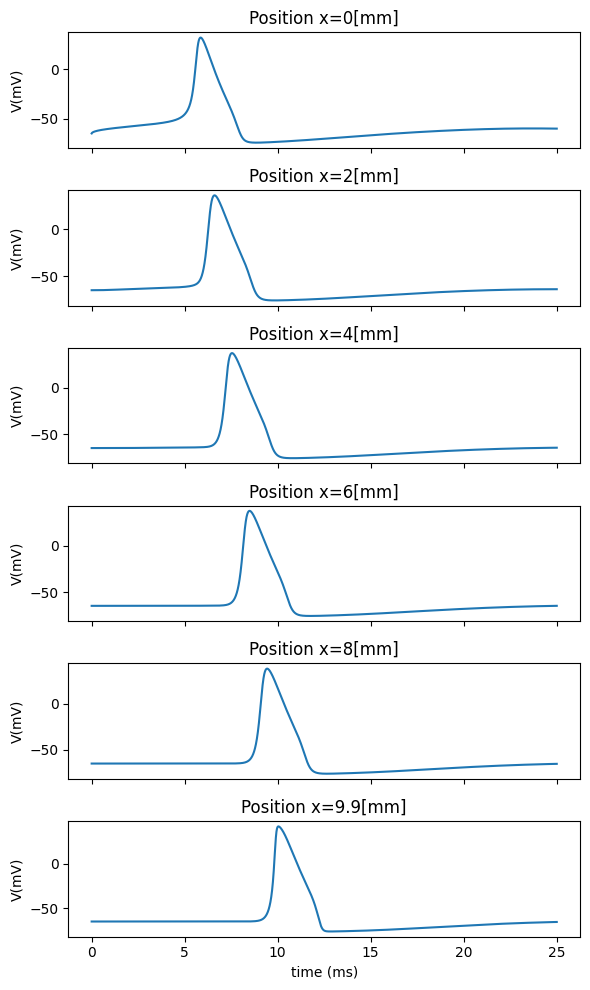

In [ ]:
# Change the value of Axon Radius
a = 20 * 10**(-3) #[mm]
r_L = 10**(-3) #[MOhm * mm]
l = 0.1 #[mm]
g_l = a / (2 * r_L * l**2)
# Define Matrix Size
t = np.arange(0, 25, 0.001)
V = np.zeros((25000, 101))
n = np.zeros_like(V)
m = np.zeros_like(V)
h = np.zeros_like(V)
# Apply the Model
V = HH_compartments()
# Plot Functions
fig, ax= plt.subplots(6, sharex=True, figsize=(6,10), dpi=100)
ax[0].plot(t, V[:, 0])
ax[0].set_title('Position x=0[mm]')
ax[0].set_ylabel('V(mV)')

ax[1].plot(t, V[:, 20])
ax[1].set_title('Position x=2[mm]')
ax[1].set_ylabel('V(mV)')

ax[2].plot(t, V[:, 40])
ax[2].set_title('Position x=4[mm]')
ax[2].set_ylabel('V(mV)')

ax[3].plot(t, V[:, 60])
ax[3].set_title('Position x=6[mm]')
ax[3].set_ylabel('V(mV)')

ax[4].plot(t, V[:, 80])
ax[4].set_title('Position x=8[mm]')
ax[4].set_ylabel('V(mV)')

ax[5].plot(t, V[:, 99])
ax[5].set_title('Position x=9.9[mm]')
ax[5].set_ylabel('V(mV)')
ax[5].set_xlabel('time (ms)')
plt.tight_layout()

### Problem 2b) (Cont'd) Calculate the Speed

In [ ]:
#Calculate the Speed
for m in range (25000):
  if V[m, 20] >= 20:
    a = m
    break
for n in range (25000):
  if V[n, 80] >= 20:
    b = n
    break
time_dif = (b-a) * 0.001
dis = 8 - 2
speed2 = dis / time_dif
print(speed2, '[m/s]')
#[mm/ms] = [m/s]

2.1299254526091587 [m/s]


In [ ]:
print(speed2/speed1)
print((20/2) ** (1/2))

3.2112176073837415
3.1622776601683795


The ratio of speeds got in b and a are roughly equal to the square-root of the radius of axion in b to that in a. \
Therefore, the velocities I got in a and b are proportional to the square-root of the axon radius.